In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 

In [5]:
%matplotlib inline

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [19]:
import math
import scipy

In [12]:
x = np.linspace(-4, 4, 100)
x

array([-4.        , -3.91919192, -3.83838384, -3.75757576, -3.67676768,
       -3.5959596 , -3.51515152, -3.43434343, -3.35353535, -3.27272727,
       -3.19191919, -3.11111111, -3.03030303, -2.94949495, -2.86868687,
       -2.78787879, -2.70707071, -2.62626263, -2.54545455, -2.46464646,
       -2.38383838, -2.3030303 , -2.22222222, -2.14141414, -2.06060606,
       -1.97979798, -1.8989899 , -1.81818182, -1.73737374, -1.65656566,
       -1.57575758, -1.49494949, -1.41414141, -1.33333333, -1.25252525,
       -1.17171717, -1.09090909, -1.01010101, -0.92929293, -0.84848485,
       -0.76767677, -0.68686869, -0.60606061, -0.52525253, -0.44444444,
       -0.36363636, -0.28282828, -0.2020202 , -0.12121212, -0.04040404,
        0.04040404,  0.12121212,  0.2020202 ,  0.28282828,  0.36363636,
        0.44444444,  0.52525253,  0.60606061,  0.68686869,  0.76767677,
        0.84848485,  0.92929293,  1.01010101,  1.09090909,  1.17171717,
        1.25252525,  1.33333333,  1.41414141,  1.49494949,  1.57

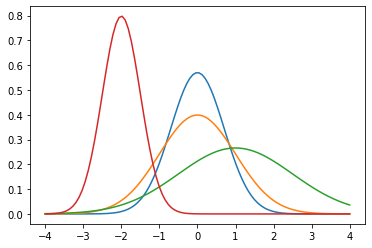

In [20]:
for mean, variance in [(0, 0.7), (0, 1), (1, 1.5), (-2, 0.5)]:
    plt.plot(x, scipy.stats.norm.pdf(x, mean, variance))
plt.show()

In [21]:
mean_expected_value = dataset['target'].mean()
mean_expected_value

22.532806324110677

In [22]:
np.mean(dataset['target'])

22.532806324110677

In [23]:
squared_errors = pd.Series(mean_expected_value - dataset['target'])**2
squared_errors

0        2.152657
1        0.870128
2      148.040602
3      118.095898
4      186.792183
          ...    
501      0.017638
502      3.735740
503      1.869219
504      0.283883
505    113.056570
Name: target, Length: 506, dtype: float64

In [24]:
sse = np.sum(squared_errors)
sse

42716.29541501977

In [26]:
print('Sum of Squared Errors (SSE): %01.f' % sse)

Sum of Squared Errors (SSE): 42716


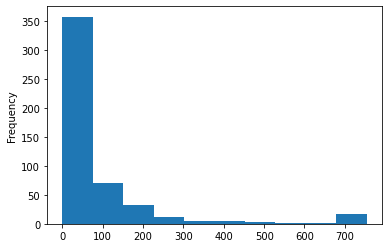

In [28]:
density_plot = squared_errors.plot(kind='hist')
plt.show()

In [29]:
def standardize(x):
    return (x - np.mean(x)/np.std(x))

In [46]:
def covariance(var1, var2, bias=0):
    observations = float(len(var1))
    return np.sum((var1 - np.mean(var1)) * (var2 - np.mean(var2))) / (observations - min(bias, 1))

def correlation(var1, var2, bias=0):
    return covariance(standardize(var1), standardize(var2), bias) / (np.std(var1) * np.std(var2))

In [47]:
from scipy.stats.stats import pearsonr

In [49]:
print("Our correlation estimation: %0.5f" % (correlation(dataset['RM'], dataset['target'])))

Our correlation estimation: 0.69536


In [51]:
print("Correlation from Scipy pearsonr estimation: %0.5f" % (pearsonr(dataset['RM'], dataset['target'])[0]))

Correlation from Scipy pearsonr estimation: 0.69536


In [60]:
x_range = [dataset['RM'].min(), dataset['RM'].max()]
x_mean = dataset['RM'].mean()
x_range, x_mean

([3.561, 8.78], 6.284634387351779)

In [59]:
y_range = [dataset['target'].min(), dataset['target'].max()]
y_mean = dataset['target'].mean()
y_range, y_mean

([5.0, 50.0], 22.532806324110677)

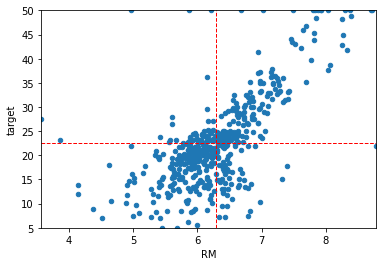

In [65]:
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanX = scatter_plot.plot([x_mean, x_mean], y_range, '--', color='red', linewidth=1)
meanY = scatter_plot.plot(x_range, [y_mean, y_mean], '--', color='red', linewidth=1)
plt.show()